# test-6

LogCircular 1:10 GO (FLUX)

23 dic 2024

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def make_plots(file_name,reference_file_name=None, show_conservative=False):
  data = pd.read_csv(file_name)
  pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
  print(data)

  if reference_file_name is not None:
    reference_data = pd.read_csv(reference_file_name)

  plt.figure(figsize=(13, 6))  # Adjust the figure size for two plots

  plt.subplot(1, 2, 1)  # Second subplot (bottom)
  plt.loglog(data['DoFs'], data['std FLUX err'],"r-+", linewidth=1.0, label='Exact Error (std)')
  plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='Estimated Error')
  if reference_file_name is not None:
    plt.loglog(reference_data['DoFs'], reference_data['std FLUX err'],"b-+", linewidth=0.3, label='GlobRef exact error (std) (Reference)')

  if show_conservative:
    plt.loglog(data['DoFs'], data['Cons. FLUX err'],"r:+", linewidth=1.0, label='Exact Error (cons)')
    if reference_file_name is not None:
      plt.loglog(reference_data['DoFs'], reference_data['Cons. FLUX err'],"b:+", linewidth=0.5, label='GlobRef exact error (cons) (Reference)')
      
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.ylabel('Error', fontsize=12)
  plt.title('Exact vs Estimated POINT error', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  plt.subplot(1, 2, 2)  # First subplot (top)
  plt.loglog(data['DoFs'], data['std FLUX err'], "r-+", linewidth=0.5, label='Exact Error')
  plt.loglog(data['DoFs'], abs(data['std FLUX err']-data["est err"]),"y-+", linewidth=0.5, label='Error in [computed value + estimated error]')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.title('Exact error and residual', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  # Adjust layout and show the plots
  plt.tight_layout()
  plt.show()

### config-2
mesh A \
Manifolf only on Bdry \
non-iso

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0    7584    7742 3.5674313951e+00 2.9288584660e-02 9.0638885160e+02   
1      1    7968    8258 3.1230346132e+00 2.5371036817e-02 8.3980611124e+02   
2      2    8664    9178 2.8707357163e+00 2.3482574651e-02 8.0622807429e+02   
3      3    9672   10594 2.8738271982e+00 2.3579363086e-02 8.0316046538e+02   
4      4   11364   12880 2.8584105512e+00 2.3451034531e-02 8.0014826416e+02   
5      5   14694   17226 2.8818099869e+00 2.3642653515e-02 8.0222706565e+02   
6      6   22260   27282 2.8143328353e+00 2.3102539150e-02 7.9490488298e+02   
7      7   37704   47680 2.2902898315e+00 1.9097127788e-02 7.3716067262e+02   
8      8   70065   89900 1.0917988634e+00 9.8651951876e-03 5.8386384729e+02   
9      9  138114  177528 2.0341690629e-01 5.9194669044e-03 4.3697721340e+02   

      std FLUX err          est err   Cons. FLUX err  
0 4.5994602189e+03 4.3399378288e+03 4.1031247000e+01  
1 2.9158921874e+03 2

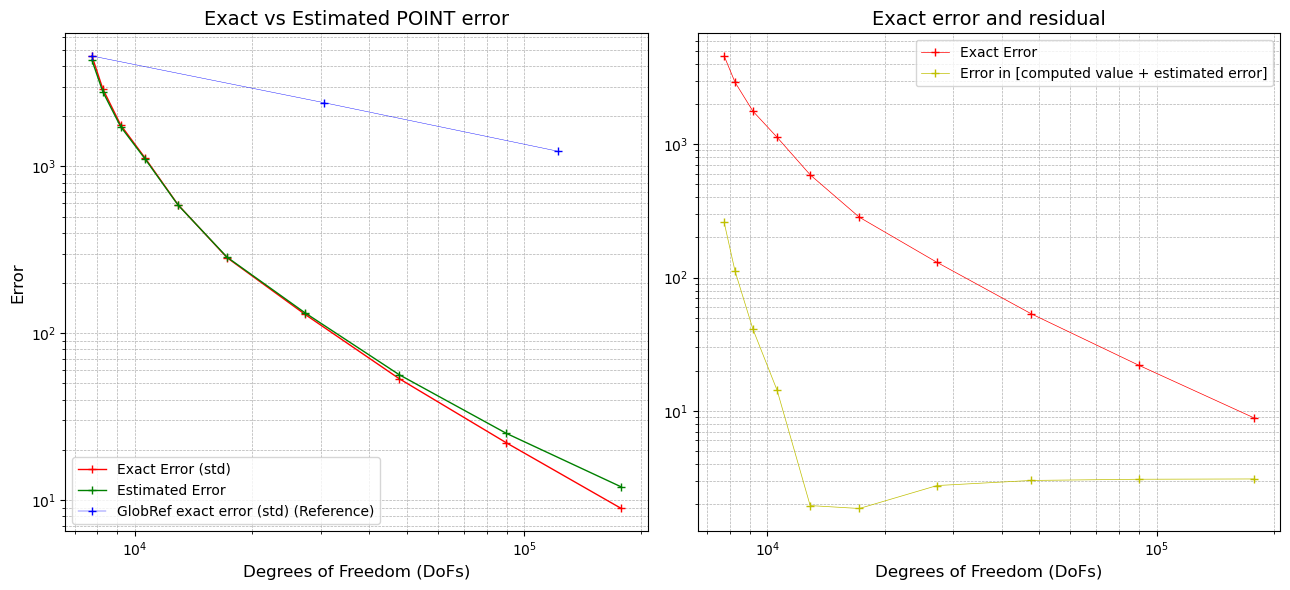

In [12]:
make_plots("./results/config-2/convergence_results.csv","./results/config-1/convergence_results.csv")

### config-4
add iso

still mesh A